In [1]:
import torch
import math
from torch import Tensor
import matplotlib.pyplot as plt 

# imports from this same folder
import loadData
import baseline
import optim
import modules
import trainAndTest

In [2]:
#torch.manual_seed(0)
print('Pytorch version: ',torch.__version__)
#PLOT_FOLDER = 'plot_folder/'

Pytorch version:  0.3.1.post2


In [3]:
# Generate data with target 0 if outside the circle or 1 if inside
train_input, train_target = loadData.generate_disc_set(1000)
test_input, test_target = loadData.generate_disc_set(1000)

# see if data are close to be balanced and plot the dataset
loadData.plot_data(train_input, train_target, show_plot = False)

# check what accuracy we could expect with a simple baseline
# e.g. with a linear classifier after having added the L2 norm of the points
baseline.baseline_linear_model(train_input,train_target,test_input,test_target)

# convert targets to one-hot encoding
train_target = loadData.convert_to_one_hot(train_target)
test_target  = loadData.convert_to_one_hot(test_target)
print('Targets converted to one-hot')

# Normalize inplace the data
loadData.normalize_data(train_input)
loadData.normalize_data(test_input)

    

#samples:        torch.Size([1000, 2])
Are the classes balanced?
#true_samples:   torch.Size([497, 2])
#false_samples:  torch.Size([503, 2])
Baseline accuracy: 99.4 %
Targets converted to one-hot


100%|██████████| 1000/1000 [00:04<00:00, 208.51it/s]


learning rate:  0.002
minimum loss:  14.917960993945599
maximum accuracy:  994
On test:  960


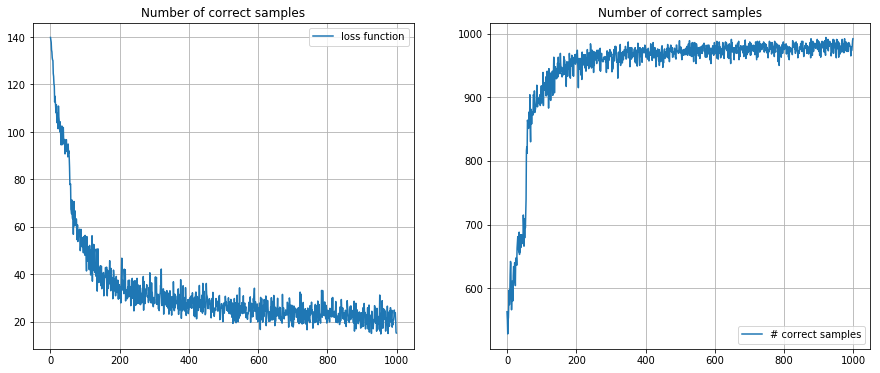

100%|██████████| 1000/1000 [00:05<00:00, 198.47it/s]


learning rate:  0.001
minimum loss:  39.33570611476898
maximum accuracy:  976
On test:  928


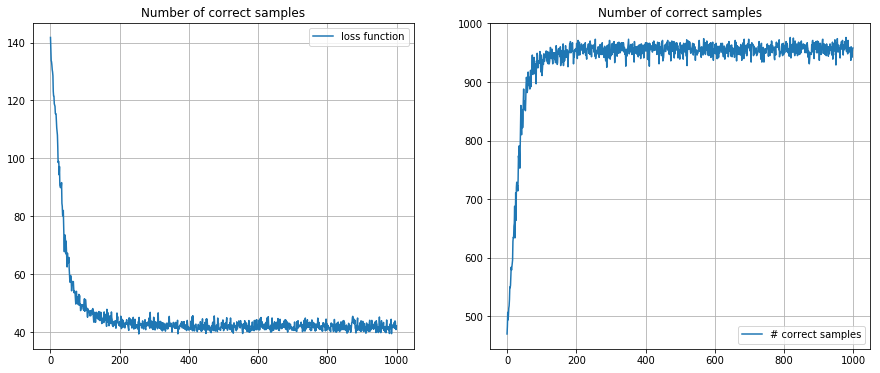

100%|██████████| 1000/1000 [00:09<00:00, 102.57it/s]


learning rate:  0.002
minimum loss:  11.112382039427757
maximum accuracy:  999
On test:  968


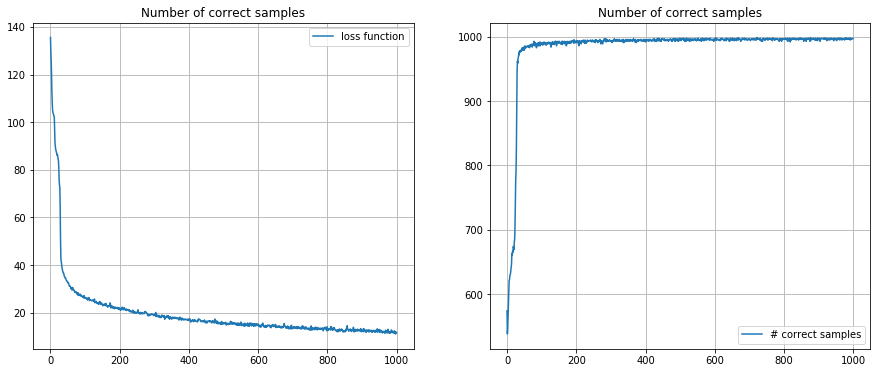

100%|██████████| 1000/1000 [00:06<00:00, 154.40it/s]


learning rate:  0.02
minimum loss:  76.25648188591003
maximum accuracy:  769
On test:  769


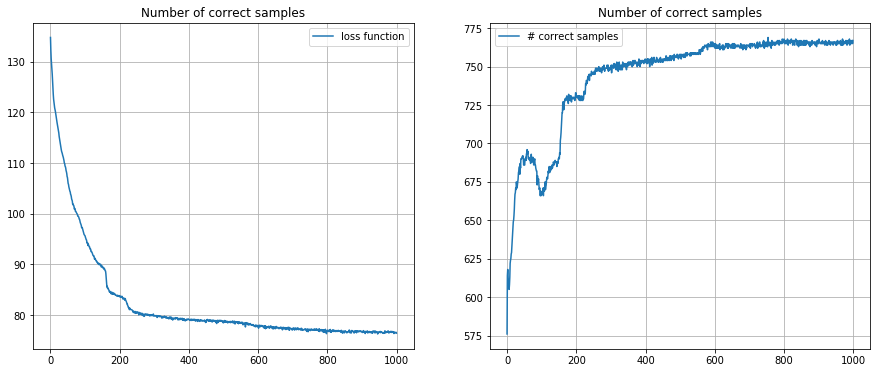

In [4]:
# create the model

#loss = LossBCE()




optimizers = [optim.SGDOptimizer, optim.SGDmomOptimizer, optim.AdamOptimizer, optim.BFGSOptimizer]
losses = [modules.LossMSE, modules.LossBCE]


lr = 0.005
loss_lists = []
train_accs = []
learning_rates=[1,0.1,0.01,0.001,0.0001,0.00001]
for (lr,num) in [(0.002,0),(0.001,1),(0.002,2),(0.02,3)]:
    Lin1 = modules.Linear(2,25)
    Lin2 = modules.Linear(25,25)
    Lin3 = modules.Linear(25,2)
    act1 = modules.ReLU()
    act2 = modules.ReLU()
    act3 = modules.Tanh()
    act4 = modules.Sigmoid()
    layers = [
        Lin1,
        act1,
        Lin2,
        act2,
        Lin3,
        act3]
    loss = modules.LossMSE()
    model = modules.Sequential(layers, loss)
    optimizer = optimizers[num](model, lr) # 
    epochs = 1000
    mini_batch_size = 50
    loss_list, train_acc = trainAndTest.train(model, optimizer, loss, train_input, train_target,\
                                              epochs, mini_batch_size, verbose = False)
    loss_lists.append(loss_list)
    train_accs.append(train_acc)

    print('learning rate: ',lr)
    print('minimum loss: ',min(loss_list))
    print('maximum accuracy: ',max(train_acc))
    print('On test: ', trainAndTest.test(model,test_input,test_target) )
    trainAndTest.plot_loss_accuracy(loss_list, train_acc)

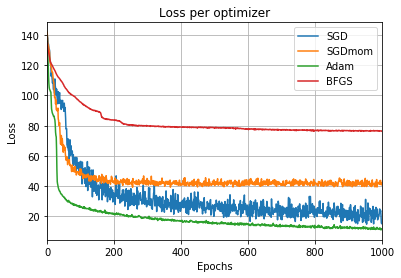

In [5]:
plt.figure()
labels=['SGD','SGDmom','Adam','BFGS']
for i,loss_list in enumerate(loss_lists):
    plt.plot(loss_list, label=labels[i])
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.xlim(0,1000)
plt.ylabel('Loss')
plt.title('Loss per optimizer')
plt.show()
#plt.savefig(PLOT_FOLDER+'loss per optimizer')

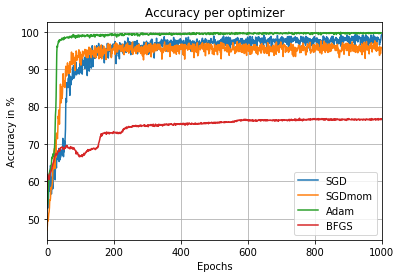

In [6]:
plt.figure()
labels=['SGD','SGDmom','Adam','BFGS']
for i,train_acc in enumerate(train_accs):
    plt.plot([x/train_input.size(0)*100 for x in train_acc], label=labels[i])
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.xlim(0,1000)
plt.ylabel('Accuracy in %')
plt.title('Accuracy per optimizer')
plt.show()
#plt.savefig(PLOT_FOLDER+'loss per optimizer')